In [58]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import statsmodels.stats.api as sms

In [2]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-varenichenko-22/My_practice/Modul_6_Statistics'

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-varenichenko-22/My_practice/Modul_6_Statistics/experiment_lesson_4.csv')

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


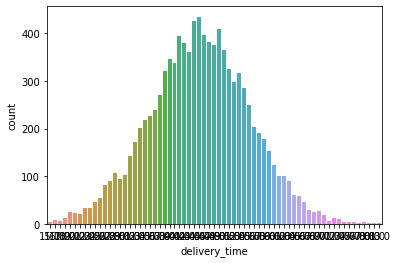

In [80]:
# Построим графики распределения для каждой из групп (контрольной и тестовой):

sns.countplot(df.query('experiment_group == "control"').delivery_time)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


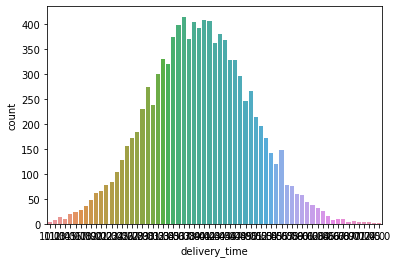

In [81]:
sns.countplot(df.query('experiment_group == "test"').delivery_time)

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

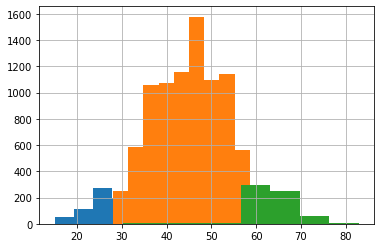

In [83]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

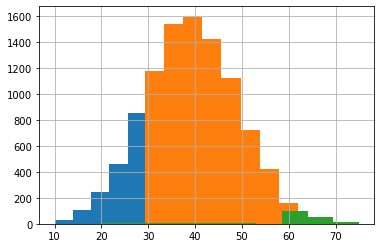

In [85]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

In [93]:
# количество наблюдений в тестовой и контрольной группе практически не отличаются

abs(df.experiment_group.value_counts()[0] - df.experiment_group.value_counts()[1])


12

In [96]:
# # Для проверки распределения на нормальность воспользуемся Шапиро-Уилк тестом (обязательно проведем сэмплирование, т.к.
# на больших выборках тест может показать неверный результат)
# используем аргумент random_state=17 для стабильности и воспроизводимости результатов.

sample_test = df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
scipy.stats.shapiro(sample_test)


ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [97]:
sample_control = df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)
scipy.stats.shapiro(sample_control)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

значения в тестовой и контрольной группах распределены нормально
p-value = [0.12,0.14] > 0.05

In [99]:
# Стандартное отклонение для обеих групп:

round(df.query('experiment_group == "control"').delivery_time.std(),2)


9.99

In [100]:
round(df.query('experiment_group == "test"').delivery_time.std(),2)

9.88

In [61]:
# Доверительный интервал
sms.DescrStatsW(df[df['experiment_group'] == 'control']['delivery_time']).tconfint_mean()

(44.870171470835864, 45.26003066947329)

In [69]:
# # T-test для контрольной и тестовой групп:
sample_control_1 = df[df['experiment_group'] == 'control']['delivery_time']
sample_test_1 = df[df['experiment_group'] == 'test']['delivery_time']
scipy.stats.ttest_ind(sample_control_1,sample_test_1)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

P value=0.0 < 0.05, значит, вероятность получить такие и более значимые различия в среднем времени доставки меньше 5% при условии, что верная нулевая гипотеза. Значит, нулевую гипотезу отклоняем - получили значимые различия.

In [102]:
# Среднее время доставки в тестовой группе изменилось на:

sample_test_1.mean() - sample_control_1.mean()

-6.018287926844998

Таким образом, выкатываем изменения на всё приложение для курьеров, так как среднее время доставки статистически значимо изменилось.